# **Team: Big Data Bandits**

*   Blessy Chinthapalli
*   Meghana Kanthadai


*   Rachita Harit
*   Shriya Yegalapati





# Problem 1 - Softmax Properties

**1. Show that the softmax function is invariant to constant offsets to its input, i.e.,
where is some constant and 1 denotes𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑎 + 𝑐1) = 𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑎), 𝑐 ∈ 𝑅
a column vector of 1s**

In [ ]:
import numpy as np

def softmax(x):
    """Compute softmax values for each set of scores in x."""
    e_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return e_x / e_x.sum()

# Define a vector
a = np.array([1.0, 2.0, 3.0])

# Calculate softmax of the original vector
softmax_a = softmax(a)

# Add a constant to the vector
c = 2.0
a_offset = a + c

# Calculate softmax of the modified vector
softmax_a_offset = softmax(a_offset)

print("Softmax without offset:", softmax_a)
print("Softmax with offset:", softmax_a_offset)


Softmax without offset: [0.09003057 0.24472847 0.66524096]
Softmax with offset: [0.09003057 0.24472847 0.66524096]


**2. In practice, why is the observation that the softmax function is invariant to
constant offsets to its input important when implementing it in a neural network?**

The observation that the softmax function is invariant to constant offsets in its input is crucial for several reasons when implementing it in neural networks:

- **Numerical Stability**: Prevents issues like numerical overflow or underflow when computing exponentials of large or small numbers, ensuring the calculations are manageable and accurate.
  
- **Consistent Results**: The relative probabilities calculated by softmax remain consistent even if the input scores are shifted by a constant. This means that the classification decisions remain unaffected by uniform shifts in input logits.

- **Improved Training**: Avoids computational errors during the training process, which can lead to NaN values or infinite loops, ensuring smoother and more stable training dynamics.

- **Flexibility in Activation Levels**: Allows the network to operate across a wide range of activation levels without impacting the output probabilities, making the model robust to variations in input scale.

These points highlight why understanding and utilizing the invariance property of softmax is beneficial for the effective training and deployment of neural networks.

# Problem-2 Training a CNN using CIFAR-10 Data

**1. Warm-up: Load the dataset and check how the images look like [3pts]**

170498071/170498071 [==============================] - 4s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


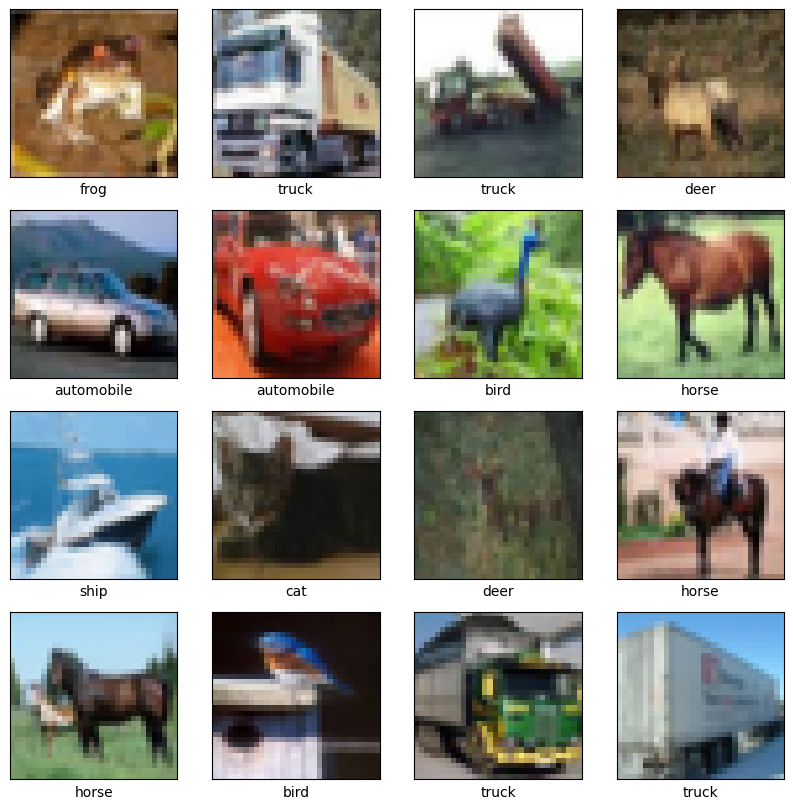

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Check the shape of the dataset
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot some sample images
def plot_sample_images(images, labels, class_names, num_rows=4, num_cols=4):
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Display the first 16 images from the training set
plot_sample_images(train_images, train_labels, class_names)


170498071/170498071 [==============================] - 2s 0us/step


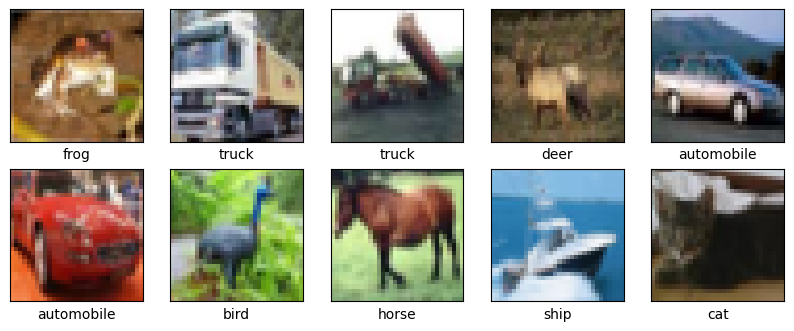

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to a 0 to 1 range
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names in the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot a grid of images
def plot_images(images, labels, classes, number_of_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(number_of_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # The CIFAR labels are arrays which need to be converted to their scalar value
        plt.xlabel(classes[labels[i][0]])
    plt.show()

# Display the first 10 images and labels
plot_images(train_images, train_labels, class_names)


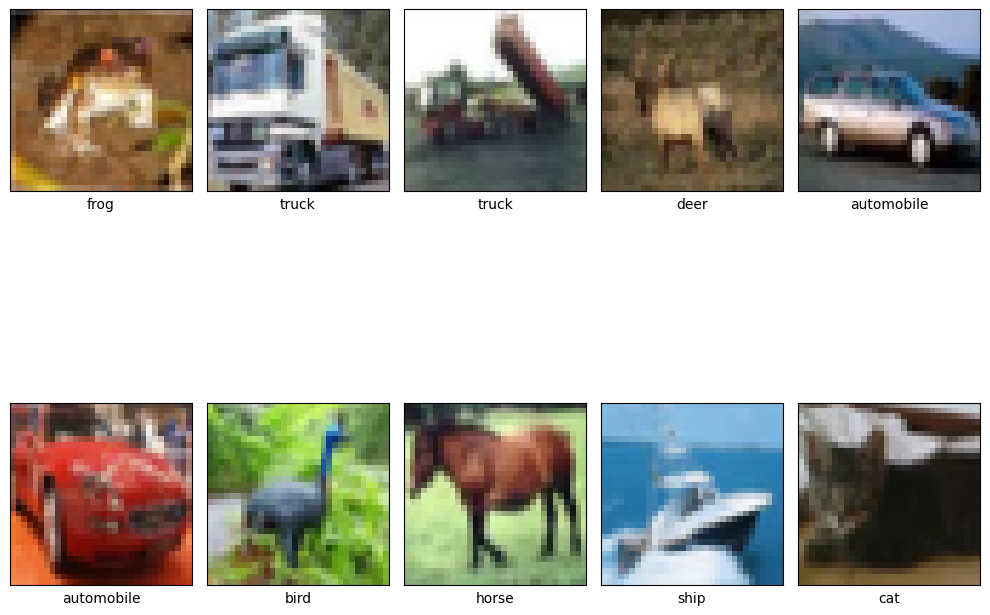

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to [0, 1]
train_images = train_images / 255.0

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 10 images with labels
plt.figure(figsize=(10, 10))
for i in range(10):
    # Plot each image
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.imshow(train_images[i])  # Plot the image
    plt.xlabel(class_names[train_labels[i][0]])  # Add the label as xlabel

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**2. Train a CNN with three hidden convolutional layers that use the ReLU activation
function. Use 64 11×11 filters for the first layer, followed by 2×2 max pooling
(stride of 2). The next two convolutional layers will use 128 3×3 filters followed by
the ReLU activation function. Prior to the softmax layer, you should have an
average pooling layer that pools across the preceding feature map. Do not use a
pre-trained CNN. Train your model using all of the CIFAR-10 training data, and
evaluate your trained system on the CIFAR-10 test data. Display the training loss
as a function of epochs. What is the accuracy on the test data? How did you
initialize the weights? Discuss your architecture and hyper-parameters.**

Epoch 1/10
1563/1563 [==============================] - 188s 120ms/step - loss: 1.8999 - accuracy: 0.2866 - val_loss: 1.6710 - val_accuracy: 0.3850
Epoch 2/10
1563/1563 [==============================] - 185s 118ms/step - loss: 1.6250 - accuracy: 0.4063 - val_loss: 1.5795 - val_accuracy: 0.4384
Epoch 3/10
1563/1563 [==============================] - 185s 118ms/step - loss: 1.5095 - accuracy: 0.4508 - val_loss: 1.4866 - val_accuracy: 0.4604
Epoch 4/10
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4102 - accuracy: 0.4894 - val_loss: 1.4472 - val_accuracy: 0.4738
Epoch 5/10
1563/1563 [==============================] - 184s 118ms/step - loss: 1.3344 - accuracy: 0.5208 - val_loss: 1.2980 - val_accuracy: 0.5296
Epoch 6/10
1563/1563 [==============================] - 185s 119ms/step - loss: 1.2721 - accuracy: 0.5477 - val_loss: 1.2593 - val_accuracy: 0.5500
Epoch 7/10
1563/1563 [==============================] - 184s 118ms/step - loss: 1.2245 - accuracy: 0.5610 - val_

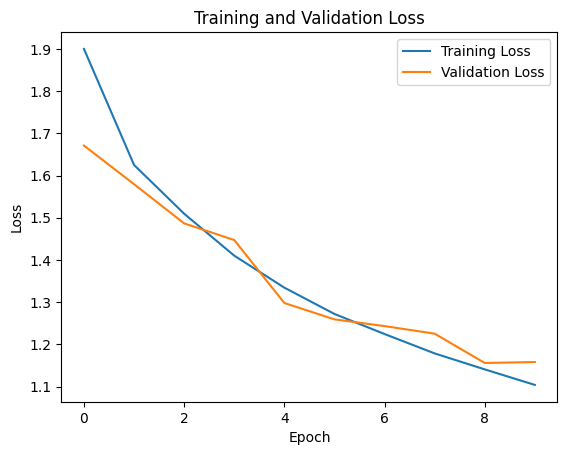

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def build_model():
    model = tf.keras.models.Sequential([
        # First convolutional layer with 64 filters of size 11x11
        tf.keras.layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),

        # Second convolutional layer with 128 filters of size 3x3
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

        # Third convolutional layer with 128 filters of size 3x3
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

        # Average pooling layer
        tf.keras.layers.GlobalAveragePooling2D(),

        # Dense layer with softmax activation for classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model

def main():
    # Build and compile the model
    model = build_model()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Load and normalize the CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy: {test_acc}")

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()




1. **Weight Initialization**:
   - In the code provided, weight initialization was not explicitly specified. By default, TensorFlow uses Glorot uniform initialization for the weights, which initializes the weights randomly from a uniform distribution.
   - Glorot uniform initialization is a common choice for weight initialization as it helps prevent vanishing or exploding gradients during training.

2. **Architecture**:
   - The CNN architecture consists of three hidden convolutional layers followed by an average pooling layer and an output softmax layer.
   - The first convolutional layer uses 64 filters of size 11x11 followed by 2x2 max pooling with a stride of 2.
   - The next two convolutional layers use 128 filters of size 3x3 followed by the ReLU activation function.
   - An average pooling layer is used before the softmax layer to pool across the preceding feature map.

3. **Hyperparameters**:
   - **Optimizer**: Adam optimizer is used with default parameters. Adam is an adaptive learning rate optimization algorithm that combines the advantages of both AdaGrad and RMSProp.
   - **Learning Rate**: The learning rate is not explicitly specified, so it defaults to the Adam optimizer's default value.
   - **Loss Function**: Sparse categorical crossentropy loss is used, which is suitable for multi-class classification problems where the labels are integers.
   - **Activation Function**: ReLU activation function is used for the convolutional layers, which helps introduce non-linearity and speeds up convergence.
   - **Number of Epochs**: The model is trained for 10 epochs. This is a hyperparameter that can be adjusted based on the model's performance on the validation set.
   - **Batch Size**: Batch size is not specified, so it defaults to 32 samples per batch, which is a common choice for training neural networks.



**3. Visualize all of the 11×11×3 filters learned by the first convolutional layer as an
RGB image array (I suggest making a large RGB image that is made up of each
of the smaller images, so it will have 4 rows and 16 columns). Note that you will
need to normalize each filter by contrast stretching to do this visualization, i.e.,
for each filter subtract the smallest value and then divide by the new largest
value. [7pts]**

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8682 - accuracy: 0.3005 - val_loss: 1.6142 - val_accuracy: 0.4011
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5994 - accuracy: 0.4135 - val_loss: 1.5281 - val_accuracy: 0.4447
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5048 - accuracy: 0.4509 - val_loss: 1.4627 - val_accuracy: 0.4702
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4381 - accuracy: 0.4802 - val_loss: 1.3991 - val_accuracy: 0.5023
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3749 - accuracy: 0.5044 - val_loss: 1.3870 - val_accuracy: 0.5034
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3227 - accuracy: 0.5274 - val_loss: 1.2992 - val_accuracy: 0.5388
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2793 - accuracy: 0.5449 - val_loss: 1.2709 - val_accuracy

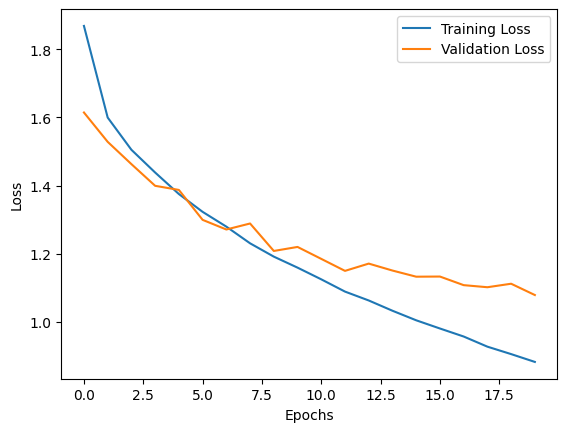

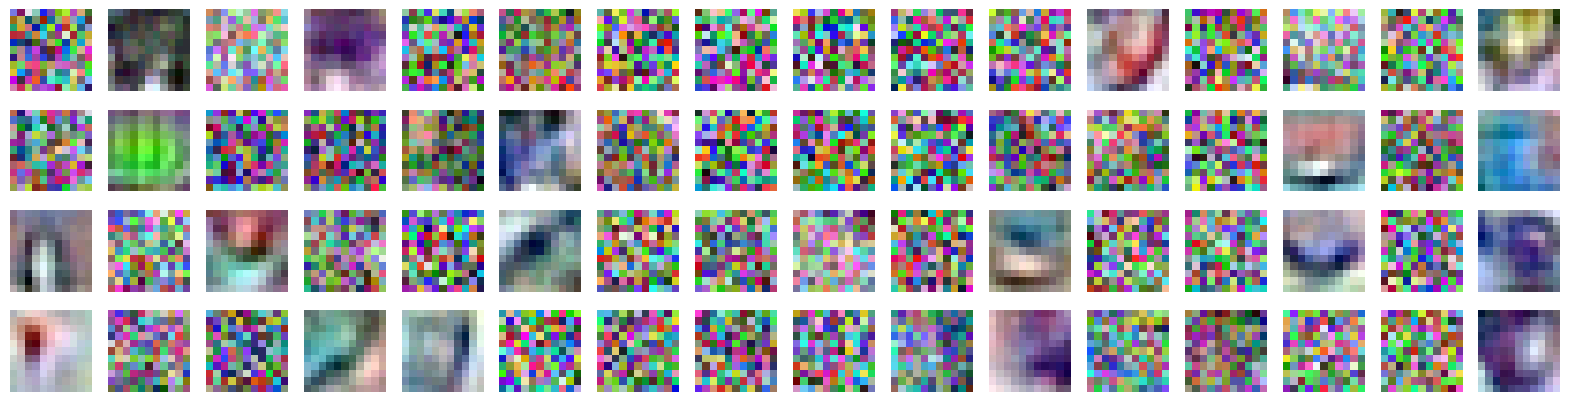

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training loss as a function of epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the filters of the first convolutional layer
def visualize_filters(filters):
    # Number of filters
    num_filters = filters.shape[3]

    # Determine grid size
    grid_size = (4, 16)

    # Create a figure to display the filters
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 5))
    axes = axes.flatten()

    for i in range(num_filters):
        # Extract the ith filter
        f = filters[:, :, :, i]
        # Normalize filter for visualization by contrast stretching
        f_min, f_max = f.min(), f.max()
        f = (f - f_min) / (f_max - f_min)
        axes[i].imshow(f)
        axes[i].axis('off')

    plt.show()

# Get the weights of the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Visualize the filters
visualize_filters(filters)


**4. Using the same architecture, add in batch normalization between each of the
hidden layers. Compare the training loss with and without batch normalization as
a function of epochs. What is the final test error? Visualize the filters. [5pts]**

Epoch 1/10
1563/1563 - 196s - loss: 1.9016 - accuracy: 0.2879 - val_loss: 1.6834 - val_accuracy: 0.3808 - 196s/epoch - 125ms/step
Epoch 2/10
1563/1563 - 192s - loss: 1.6196 - accuracy: 0.4076 - val_loss: 1.5434 - val_accuracy: 0.4467 - 192s/epoch - 123ms/step
Epoch 3/10
1563/1563 - 182s - loss: 1.5055 - accuracy: 0.4544 - val_loss: 1.4812 - val_accuracy: 0.4603 - 182s/epoch - 116ms/step
Epoch 4/10
1563/1563 - 183s - loss: 1.4291 - accuracy: 0.4856 - val_loss: 1.4039 - val_accuracy: 0.4915 - 183s/epoch - 117ms/step
Epoch 5/10
1563/1563 - 190s - loss: 1.3670 - accuracy: 0.5103 - val_loss: 1.3487 - val_accuracy: 0.5198 - 190s/epoch - 122ms/step
Epoch 6/10
1563/1563 - 183s - loss: 1.3068 - accuracy: 0.5333 - val_loss: 1.3691 - val_accuracy: 0.5210 - 183s/epoch - 117ms/step
Epoch 7/10
1563/1563 - 200s - loss: 1.2557 - accuracy: 0.5531 - val_loss: 1.2671 - val_accuracy: 0.5490 - 200s/epoch - 128ms/step
Epoch 8/10
1563/1563 - 184s - loss: 1.2077 - accuracy: 0.5700 - val_loss: 1.2195 - val_acc

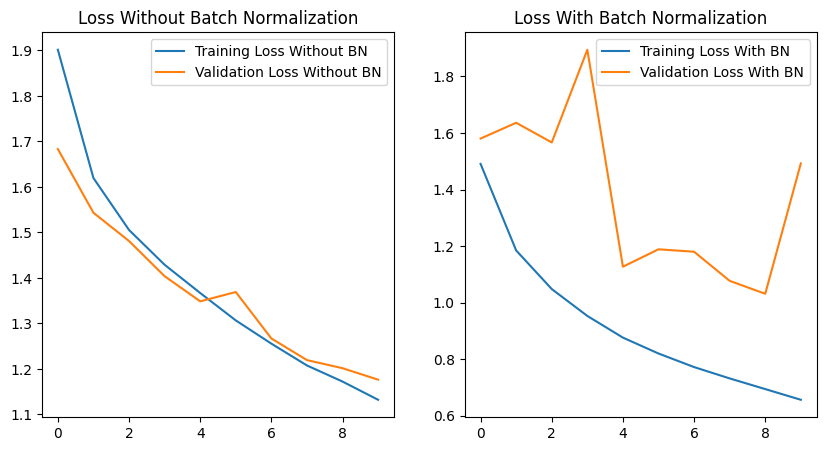

Final Test Error without Batch Normalization: 41.03%
Final Test Error with Batch Normalization: 45.97%


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to create the model with optional batch normalization
def create_model(use_batch_norm=False):
    model = models.Sequential()
    # First convolutional layer
    model.add(layers.Conv2D(64, (11, 11), input_shape=(32, 32, 3)))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(128, (3, 3)))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (3, 3)))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Global Average Pooling and output layer
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10))

    return model

# Create and train models
def train_and_evaluate(use_batch_norm):
    model = create_model(use_batch_norm)
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    return history, test_loss, test_accuracy

# Train models with and without batch normalization
history_no_bn, test_loss_no_bn, test_accuracy_no_bn = train_and_evaluate(use_batch_norm=False)
history_bn, test_loss_bn, test_accuracy_bn = train_and_evaluate(use_batch_norm=True)

# Plotting training and validation loss
def plot_loss(history_no_bn, history_bn):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_no_bn.history['loss'], label='Training Loss Without BN')
    plt.plot(history_no_bn.history['val_loss'], label='Validation Loss Without BN')
    plt.title('Loss Without Batch Normalization')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_bn.history['loss'], label='Training Loss With BN')
    plt.plot(history_bn.history['val_loss'], label='Validation Loss With BN')
    plt.title('Loss With Batch Normalization')
    plt.legend()
    plt.show()

plot_loss(history_no_bn, history_bn)

print(f"Final Test Error without Batch Normalization: {(1 - test_accuracy_no_bn) * 100:.2f}%")
print(f"Final Test Error with Batch Normalization: {(1 - test_accuracy_bn) * 100:.2f}%")


# **Problem 3: GAN using Fasion-MNIST Data**

# **1. Vanilla GAN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np

#Loading the Fashion-MNIST dataset using Keras
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

In [ ]:
import tensorflow_datasets as tfds

#Loading the Fashion-MNIST dataset using TensorFlow Datasets
(train_dataset, test_dataset), dataset_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True
)

#Preprocessing using TensorFlow Datasets
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    return image, label

#Pre-processing the datasets
train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

## Generator G Architecture:

Here's a breakdown of the steps performed in the `make_generator_model()` function:

1. The model is initialized as a Sequential model.
2. The first layer is a fully connected layer (`Dense`) with 7x7x256 neurons. It takes a 100-dimensional noise vector as input.
3. Batch normalization is applied to normalize the activations of the previous layer.
4. The Rectified Linear Unit (ReLU) activation function is applied to introduce non-linearity.
5. The output of the previous layer is reshaped into a 7x7x256 tensor.
6. The first transposed convolutional layer (`Conv2DTranspose`) upsamples the input tensor to a larger spatial resolution (14x14x128) using a 5x5 kernel and stride of 1.
7. Batch normalization and ReLU activation are applied to the output of the previous layer.
8. The second transposed convolutional layer upsamples the tensor further to a spatial resolution of 28x28x64 using a 5x5 kernel and stride of 2.
9. Batch normalization and ReLU activation are applied again.
10. The final transposed convolutional layer produces a 28x28x1 output tensor (image) using a 5x5 kernel, stride of 2, and `tanh` activation function. The `tanh` activation ensures the pixel values are in the range [-1, 1], representing grayscale image intensities.

The generator network is an essential component of a Generative Adversarial Network (GAN) and is responsible for generating realistic-looking images from random noise.

In [ ]:
#Defining the generator network
def make_generator_model():
    model = keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias = False, input_shape = (100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides = (2, 2), padding ='same', use_bias = False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides = (2, 2), padding = 'same', use_bias = False, activation = 'tanh'))

    return model

## Discriminator D Architecture:


The discriminator architecture consists of a sequential model with several layers:

Flatten layer: This layer reshapes the input image from a 2D shape of (28, 28, 1) into a flattened vector of shape (784,) to prepare it for further processing.

Dense layer with 128 units: This fully connected layer takes the flattened input and applies a linear transformation followed by the ReLU activation function. It helps in learning complex patterns and representations from the input data.

Dense layer with 64 units: Another fully connected layer with a ReLU activation function is added to further capture and learn more intricate features from the data.

Dense layer with 1 unit: This final layer is responsible for producing a single output value that indicates the probability of the input image being real or fake. It uses the sigmoid activation function to squash the output between 0 and 1, representing the likelihood of the input image being real (1) or fake (0).

In [ ]:
#Defining the discriminator network
def make_discriminator_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape = (28, 28, 1)))  # Reshape input to a flattened vector
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    return model

##Loss Functions for G & D

In [ ]:
#Defining the loss functions
def generator_loss(fake_output):
    return tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output))

def discriminator_loss(real_output, fake_output):
    real_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output))
    fake_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output))
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
#Defining the optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

#Defining the models
generator = make_generator_model()
discriminator = make_discriminator_model()

In [ ]:
##Defining the training loop
@tf.function
def train_step(images):
 # Generate random noise for the generator input
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#Generating random noise for the generator input
        generated_images = generator(noise, training=True)

#Getting the discriminator outputs for real and fake images
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
#Calculating generator and discriminator losses
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
#Computing gradients of generator and discriminator losses with respect to their trainable variables
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#Applying gradients to update the generator and discriminator parameters
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [ ]:
#Generating sample images for different training stages
def generate_and_save_images(model, epoch):
    noise = tf.random.normal([16, 100])
    generated_images = model(noise, training=False)
    generated_images = 0.5 * generated_images + 0.5  # Rescale images to [0, 1]

    fig, axs = plt.subplots(4, 4)
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(generated_images[count, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.suptitle(f'Generated Images Epoch {epoch}')
    plt.show()

In [ ]:
# Defining the training parameters
num_epochs = 30
batch_size = 128  # Decreased batch size from 256 to 64
sample_interval = 10
images_gen = []
g_loss = []
d_loss = []
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Defining the training loop
for epoch in range(num_epochs):
    gen_losses = []
    disc_losses = []

    # Iterating over each batch in the train_dataset
    for batch in train_dataset:
        # Generating random noise
        noise = tf.random.normal([batch_size, 100])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = generator(noise, training=True)

            real_output = discriminator(batch, training=True)
            fake_output = discriminator(generated_images, training=True)

            gen_loss = generator_loss(fake_output)
            disc_loss = discriminator_loss(real_output, fake_output)

        # Calculating gradients and update generator and discriminator weights
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)

    # Calculating average losses
    avg_gen_loss = sum(gen_losses) / len(gen_losses)
    avg_disc_loss = sum(disc_losses) / len(disc_losses)
    g_loss.append(avg_gen_loss)
    d_loss.append(avg_disc_loss)

    # Printing loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs} completed, Generator Loss: {avg_gen_loss:.4f}, Discriminator Loss: {avg_disc_loss:.4f}")

    # Generating sample images at specified intervals
    if (epoch + 1) % sample_interval == 0:
        random_noise = tf.random.normal([1, 100])
        generated_images = generator(random_noise, training=False)
        images_gen.append(generated_images)


Epoch 1/30 completed, Generator Loss: 0.3522, Discriminator Loss: 2.0397
Epoch 2/30 completed, Generator Loss: 0.7616, Discriminator Loss: 1.4646
Epoch 3/30 completed, Generator Loss: 0.9118, Discriminator Loss: 1.3717
Epoch 4/30 completed, Generator Loss: 0.9594, Discriminator Loss: 1.2363
Epoch 5/30 completed, Generator Loss: 0.6810, Discriminator Loss: 1.3675
Epoch 6/30 completed, Generator Loss: 0.6588, Discriminator Loss: 1.4042
Epoch 7/30 completed, Generator Loss: 0.6693, Discriminator Loss: 1.3976
Epoch 8/30 completed, Generator Loss: 0.6944, Discriminator Loss: 1.4011
Epoch 9/30 completed, Generator Loss: 0.7243, Discriminator Loss: 1.3652
Epoch 10/30 completed, Generator Loss: 0.7319, Discriminator Loss: 1.3507
Epoch 11/30 completed, Generator Loss: 0.7745, Discriminator Loss: 1.3067
Epoch 12/30 completed, Generator Loss: 0.8616, Discriminator Loss: 1.2752
Epoch 13/30 completed, Generator Loss: 0.8441, Discriminator Loss: 1.2475
Epoch 14/30 completed, Generator Loss: 0.8196, 

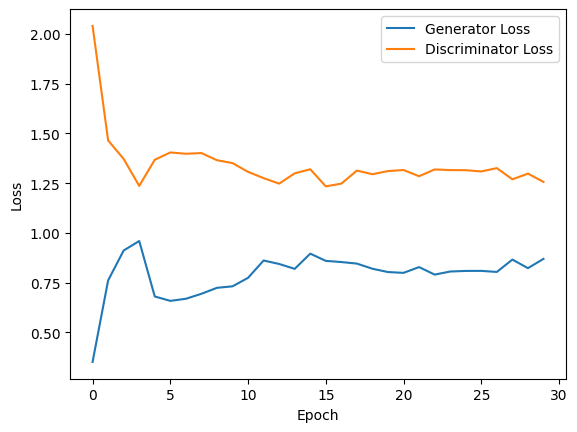

In [ ]:
import matplotlib.pyplot as plt

#Plotting the training loss curves
plt.plot(g_loss, label='Generator Loss')
plt.plot(d_loss, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

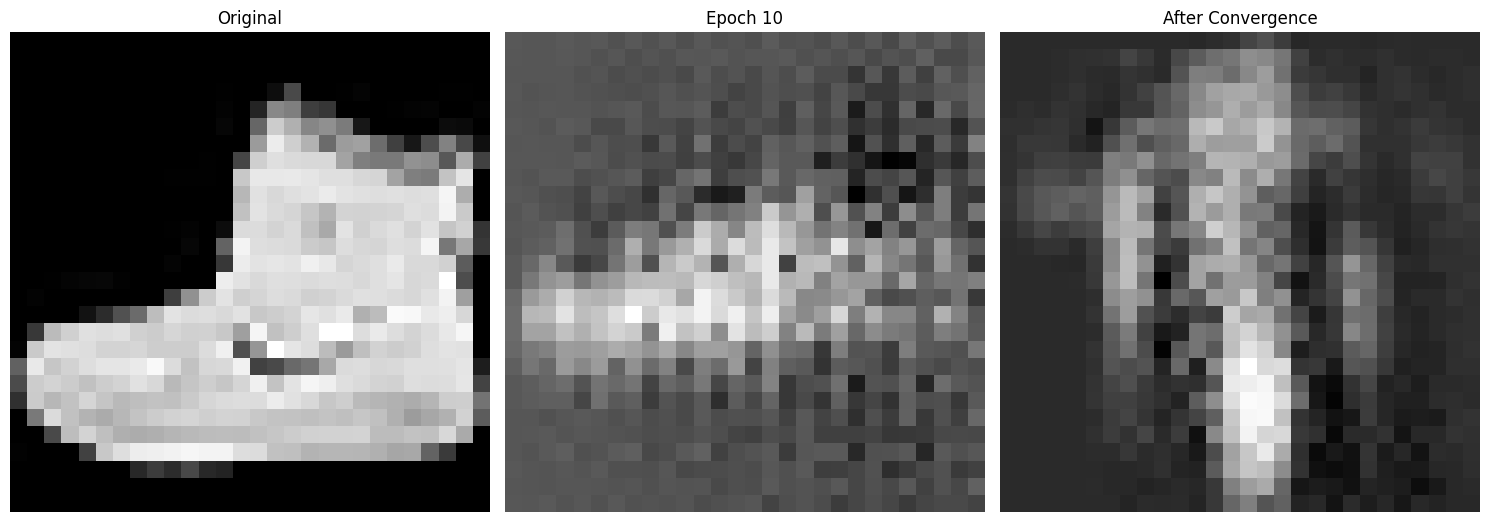

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 6))  # Creating a figure with three subplots

# Show samples from the beginning of training
axes[0].imshow(train_images[0], cmap='gray')
axes[0].axis('off')
axes[0].set_title("Original")

# Show samples from intermediate stages of training
if len(images_gen) > 0:
    # Take the first generated image (index 0)
    gen_img = (images_gen[0][0, :, :, 0] * 255.0).numpy().astype(int)
    axes[1].imshow(gen_img, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(f"Epoch {sample_interval}")

# Show samples from the latest stage of training (after convergence)
if len(images_gen) > 1:
    gen_img_converged = (images_gen[-1][0, :, :, 0] * 255.0).numpy().astype(int)
    axes[2].imshow(gen_img_converged, cmap='gray')
    axes[2].axis('off')
    axes[2].set_title("After Convergence")

plt.tight_layout()  # Adjusting spacing between subplots
plt.show()  # Showing the plot


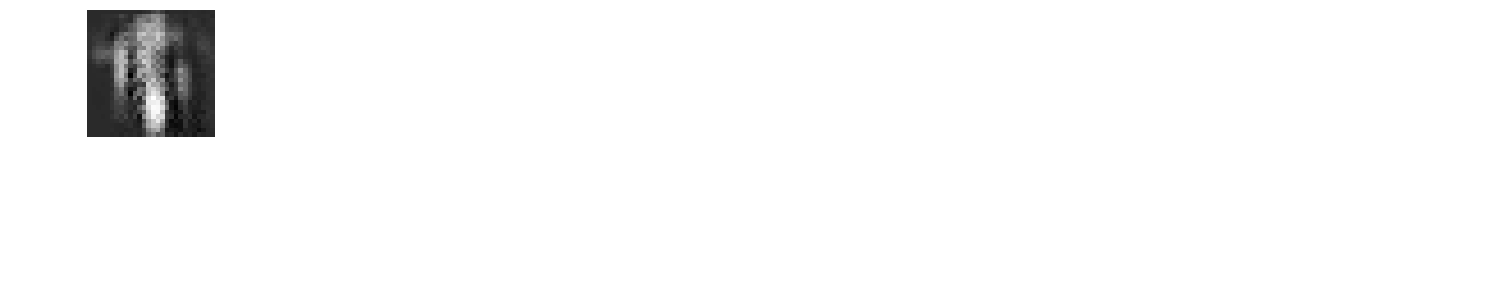

In [ ]:
import matplotlib.pyplot as plt



fig, axes = plt.subplots(2, 5, figsize=(15, 3))

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        idx = i * 5 + j
        if idx < len(generated_images):
            image = generated_images[idx].numpy().reshape(28, 28)
            ax.imshow(image, cmap='gray')
        ax.axis('off')

plt.tight_layout()
plt.show()


# **2. Mode Collapse in GANs**

In [ ]:
#Loading and preprocessing the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)

def make_discriminator_model_copy():
    #Creating a discriminator model with 10 output units for classification
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides = (2, 2), padding = 'same', input_shape = [28, 28, 1]))  # Convolutional layer with 64 filters, kernel size 5x5, and stride 2x2
    model.add(layers.ReLU())  # ReLU activation function
    model.add(layers.Dropout(0.3))  # Dropout layer for regularization

    model.add(layers.Conv2D(128, (5, 5), strides = (2, 2), padding = 'same'))  # Convolutional layer with 128 filters, kernel size 5x5, and stride 2x2
    model.add(layers.ReLU())  # ReLU activation function
    model.add(layers.Dropout(0.3))  # Dropout layer for regularization

    model.add(layers.Flatten())  # Flatten the feature maps
    model.add(layers.Dense(10, activation='softmax'))  # Fully connected layer with 10 output units and softmax activation for classification

    return model

discriminator_copy = make_discriminator_model_copy()

# Compile the discriminator_copy model with appropriate optimizer and loss function
discriminator_copy.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the discriminator_copy on the Fashion-MNIST training set
discriminator_copy.fit(train_images, train_labels, epochs = 40, batch_size = 128)

# Evaluate the accuracy of the trained discriminator_copy on the Fashion-MNIST test set
_, accuracy = discriminator_copy.evaluate(test_images, keras.utils.to_categorical(test_labels, num_classes))
print("Accuracy on Fashion-MNIST test set:", accuracy)


Epoch 1/40
469/469 [==============================] - 6s 7ms/step - loss: 0.5164 - accuracy: 0.8159
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3515 - accuracy: 0.8750
Epoch 3/40
469/469 [==============================] - 3s 7ms/step - loss: 0.3127 - accuracy: 0.8868
Epoch 4/40
469/469 [==============================] - 3s 7ms/step - loss: 0.2874 - accuracy: 0.8951
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2689 - accuracy: 0.9017
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2547 - accuracy: 0.9075
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2412 - accuracy: 0.9125
Epoch 8/40
469/469 [==============================] - 3s 7ms/step - loss: 0.2302 - accuracy: 0.9156
Epoch 9/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2204 - accuracy: 0.9190
Epoch 10/40
469/469 [==============================] - 3s 6ms/step - loss: 0.2119 - accuracy: 0.9225

Accuracy is 91.6&

94/94 [==============================] - 0s 2ms/step


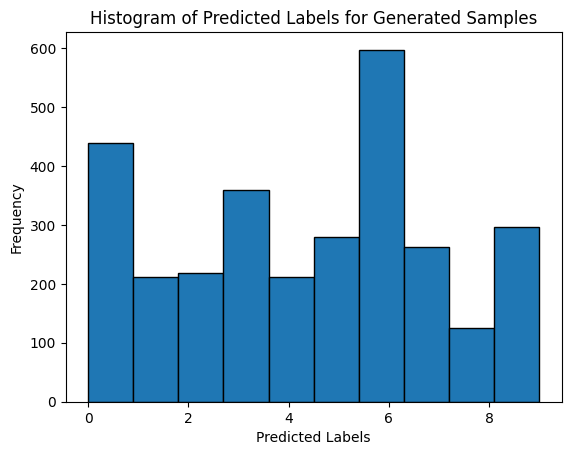

In [ ]:
#Generating 3000 samples using the trained generator
noise = tf.random.normal([3000, 100])
generated_images = generator(noise, training=False)

#Using the classifier to predict the class labels of the generated samples
predicted_labels = discriminator_copy.predict(generated_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

#Plotting the histogram of predicted labels
plt.figure()
plt.hist(predicted_labels, bins=10, edgecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Generated Samples')
plt.show()


The histogram is not uniform as plotted as explained by Collapse problem

# Train Unrolled GAN

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Assuming generator, discriminator, generator_loss, discriminator_loss,
# generator_optimizer, and discriminator_optimizer are already defined

# Unroll steps
k = 5

# Training step
@tf.function
def train_step(real_images):
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        fake_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    for _ in range(k):
        with tf.GradientTape() as disc_tape:
            fake_images_unroll = generator(noise, training=True)
            real_output_unroll = discriminator(real_images, training=True)
            fake_output_unroll = discriminator(fake_images_unroll, training=True)
            disc_loss_unroll = discriminator_loss(real_output_unroll, fake_output_unroll)

        gradients_of_discriminator = disc_tape.gradient(disc_loss_unroll, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Load and preprocess Fashion-MNIST dataset
(train_images, train_labels), (_, _) = keras.datasets.fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
train_images = tf.expand_dims(train_images, axis=-1)
batch_size = 64  # Reduced batch size for faster training
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Training loop
epochs = 20
for epoch in range(epochs):
    gen_losses = []
    disc_losses = []
    for image_batch in train_dataset:
        gen_loss, disc_loss = train_step(image_batch)
        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)

    avg_gen_loss = sum(gen_losses) / len(gen_losses)
    avg_disc_loss = sum(disc_losses) / len(disc_losses)

    print(f"Epoch {epoch+1}/{epochs}, Generator Loss: {avg_gen_loss:.4f}, Discriminator Loss: {avg_disc_loss:.4f}")


Epoch 1/20, Generator Loss: 2.0325, Discriminator Loss: 0.7244
Epoch 2/20, Generator Loss: 2.0969, Discriminator Loss: 0.7045
Epoch 3/20, Generator Loss: 2.1121, Discriminator Loss: 0.7213
Epoch 4/20, Generator Loss: 2.1479, Discriminator Loss: 0.7219
Epoch 5/20, Generator Loss: 2.2315, Discriminator Loss: 0.7110
Epoch 6/20, Generator Loss: 2.1674, Discriminator Loss: 0.7415
Epoch 7/20, Generator Loss: 2.1843, Discriminator Loss: 0.7246
Epoch 8/20, Generator Loss: 2.1720, Discriminator Loss: 0.7460
Epoch 9/20, Generator Loss: 2.1774, Discriminator Loss: 0.7322
Epoch 10/20, Generator Loss: 2.1843, Discriminator Loss: 0.7389
Epoch 11/20, Generator Loss: 2.1812, Discriminator Loss: 0.7359
Epoch 12/20, Generator Loss: 2.1961, Discriminator Loss: 0.7409
Epoch 13/20, Generator Loss: 2.2136, Discriminator Loss: 0.7312
Epoch 14/20, Generator Loss: 2.2362, Discriminator Loss: 0.7241
Epoch 15/20, Generator Loss: 2.2259, Discriminator Loss: 0.7295
Epoch 16/20, Generator Loss: 2.2079, Discriminato

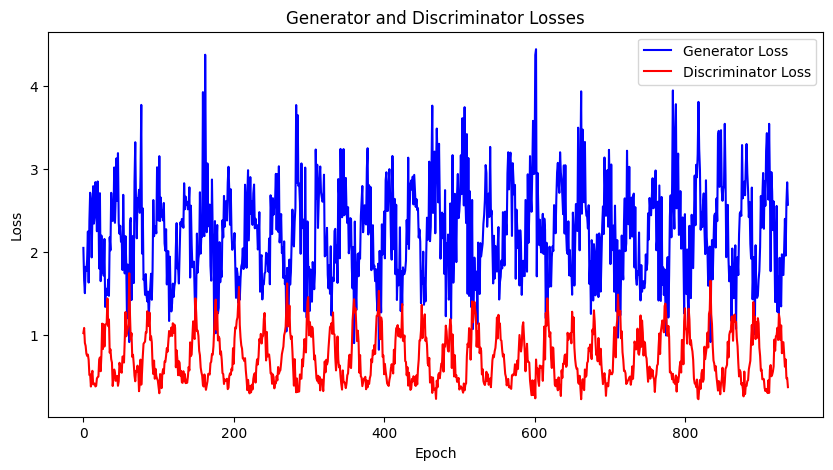

In [ ]:
# Plot the training G and D losses

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss', color='blue')
plt.plot(disc_losses, label='Discriminator Loss', color='red')
plt.title('Generator and Discriminator Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Generate 3000 Samples and plot Histogram**

In [ ]:
import math

num_samples = 3000

# Generate samples
noise = tf.random.normal([num_samples, 100])
generated_images = generator.predict(noise)

94/94 [==============================] - 1s 3ms/step


94/94 [==============================] - 1s 6ms/step


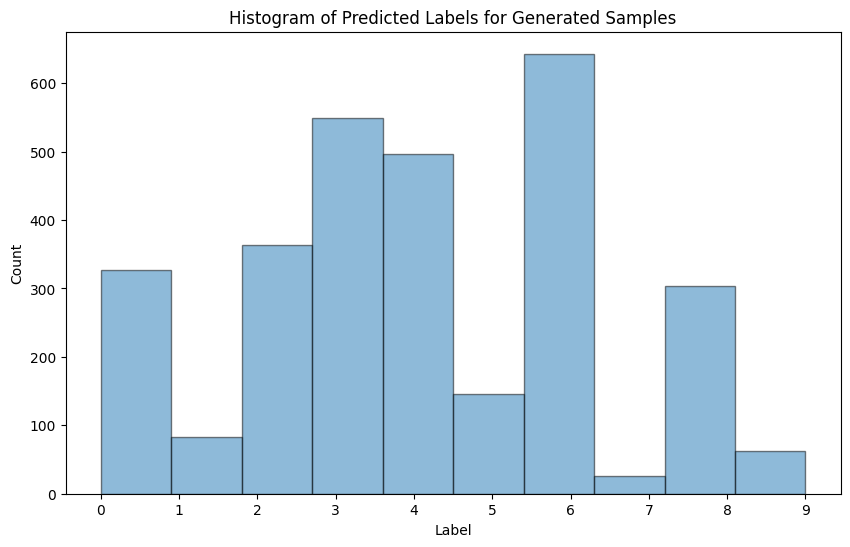

In [ ]:
# Predict labels using discriminator
predictions = discriminator_copy.predict(generated_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot histogram of predicted labels
plt.figure(figsize=(10, 6))
plt.hist(predicted_labels, bins=10, alpha=0.5, edgecolor='black')
plt.xticks(range(10))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Predicted Labels for Generated Samples')
plt.show()

Mode collapse occurs when a GAN generates samples that primarily belong to a few modes or classes, neglecting the diversity of the underlying data distribution. The unrolled GAN approach aims to address this issue by unrolling the training process, which involves performing multiple iterations of discriminator updates for each generator update.

We see that the Unrolled GAN can provide reduce the Mode Collapse Problem.
Analysing both histograms give us the idea the reduction has happened.

Multiple bars or peaks spread across different labels indicates that the generator is generating samples from various classes, suggesting reduced mode collapse.

Balanced distribution or the bars in the histogram should be roughly equal in height, indicating that the generator is not biased towards a specific label.

As the histogram from the unrolled GAN shows improvements compared to previous histograms or demonstrates the desired characteristics mentioned above, we can say that it is an effective solution

# **Problem 4: Exploring the Capabilities of ChatGPT**

1. Write a brief description of your use case, including the problem it solves and
how ChatGPT-4 can be used to solve it.




Use Case: Language Learning Tool

Problem it Solves:
Language learning can be a challenging and time-consuming process. Traditional methods often lack interactivity, personalization, and real-time feedback, making it difficult for learners to stay engaged and progress effectively. This can be especially problematic for those with busy schedules or limited access to language learning resources.

How ChatGPT-4 Can Be Used to Solve It:
ChatGPT-4 can serve as an advanced language learning tool by providing interactive and personalized language practice. It can simulate conversations in various languages, offer instant corrections, and adapt to the learner’s level and pace. The tool can also generate customized exercises, provide explanations for grammar and vocabulary, and offer cultural insights to enhance learning. By leveraging ChatGPT-4's natural language processing capabilities, users can experience immersive language practice anytime, anywhere.


2. What is its potential impact?



Potential Impact
Impact:
The integration of ChatGPT-4 into language learning can significantly enhance the effectiveness and accessibility of language education. It can democratize language learning by providing high-quality, interactive practice to anyone with an internet connection. This tool can cater to individual learning styles and paces, making language learning more engaging and efficient. Additionally, it can help bridge communication gaps, promote cultural exchange, and improve global connectivity. For educational institutions and language learning platforms, this tool can complement existing curricula, offering students additional practice and support.


3. Reflect on how deep learning and language models like ChatGPT can be used to
solve real-world problems, and how you might incorporate these technologies
into your future work.


Deep Learning and Language Models in Solving Real-World Problems:
Deep learning and language models like ChatGPT are transforming numerous industries by enabling machines to understand and generate human language. These technologies can solve real-world problems by automating complex tasks, providing intelligent insights, and enhancing human-computer interaction. For instance, they can be used in customer service to offer instant support, in healthcare for patient communication and record keeping, and in content creation for generating high-quality text.

Incorporation into Future Work:
In future work, particularly in business analytics and data science, we plan to incorporate these technologies to enhance data-driven decision-making and operational efficiency. For example, we can use language models to analyze customer feedback, generate reports, and automate data analysis tasks. In the field of autonomous vehicles, language models can assist in interpreting and processing complex sensor data, improving behavior prediction systems. Furthermore, in financial solutions, they can help in developing predictive models for credit risk and conducting advanced analytics to offer personalized financial advice. Embracing these technologies will enable me to create innovative solutions that drive business growth and improve user experiences.






